# Short-term Reversal

In [7]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

import activity as act
import available as avb
import utils as self_utils
from quantified_strategies import strategy_utils as utils

In [2]:
TICKER = "VUSA.LSE"

START = dt.date(2010, 1, 1)
END = dt.date.today()

In [3]:
results = self_utils.run(ticker=TICKER, start=START, end=END, full=True)
results

{}
remove api from here


,Close,enter,exit,exit_shifted,return,down_from_yday,down_xdays_in_a_row,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,,,,,
2012-05-24,16.0600,16.0600,16.0600,16.1100,0.003113,False,0.0,False,0.0,0.000000,0.003113,False,0
2012-05-25,16.1100,16.1100,16.1100,16.1900,0.004966,False,0.0,False,0.0,0.000000,0.008095,False,0
2012-05-29,16.1900,16.1900,16.1900,16.1000,-0.005559,False,0.0,False,-0.0,0.000000,0.002491,False,0
2012-05-30,16.1000,16.1000,16.1000,16.0700,-0.001863,True,1.0,False,-0.0,0.000000,0.000623,False,0
2012-05-31,16.0700,16.0700,16.0700,15.9800,-0.005600,True,2.0,False,-0.0,0.000000,-0.004981,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-27,75.8100,75.8100,75.8100,76.1225,0.004122,True,2.0,False,0.0,0.565637,3.739882,False,154
2024-02-28,76.1225,76.1225,76.1225,76.2550,0.001741,False,2.0,False,0.0,0.565637,3.748132,False,154
2024-02-29,76.2550,76.2550,76.2550,76.8300,0.007540,False,1.0,False,0.0,0.565637,3.783935,False,154


In [23]:
trade_ret = results.groupby("trade_number")["strat_ret"].apply(lambda x: utils.get_cumulative_return(returns=x, total=True))
trade_ret.index = trade_ret.index.map(results.reset_index().groupby("trade_number")["Date"].first().to_dict())
trade_ret

trade_number
2012-05-24    0.000000
2012-06-01    0.009387
2012-06-25    0.005562
2012-08-22   -0.002588
2012-09-05    0.006535
                ...   
2023-10-05    0.004321
2023-10-20    0.001211
2023-10-27    0.001817
2023-11-27   -0.004845
2024-01-05    0.002072
Name: strat_ret, Length: 155, dtype: float64

In [24]:
utils.describe(returns=trade_ret, daily=False, asset=TICKER)

Asset                        VUSA.LSE
Start                      2012-05-24
End                        2024-01-05
Mean Return                  0.29596%
Total Return                   56.56%
Median Return                0.39675%
1st Quartile                 0.01452%
3rd Quartile                 0.95810%
Std Dev Return               1.12258%
CAGR                       28.964 bps
Trade CAGR                        N/A
Ann. CAGR                         N/A
Activity Ratio                100.00%
Number of Trades                  0.0
Average Hold Period       155.00 Days
Daily Sharpe Ratio             0.2636
Ann. Sharpe Ratio              4.1851
Adj. Ann. Sharpe Ratio         4.1851
Daily Sortino Ratio             0.247
Ann. Sortino Ratio             3.9205
Daily Calmar Ratio              8.735
Hit Ratio                      75.48%
Profit Factor                   2.08x
MDD                            -6.48%
MDD Start                  2017-12-28
MDD Bottom                 2018-12-14
MDD End     

## Rules

1. SPY must be down three days in a row (close to close).
2. Entry on the third down day at the close.
3. Exit on the open the next day

In [4]:
N_BEAR_DAYS = 3
ENTER_AT = "Close"
EXIT_AT = "Close"

START = dt.date(2010, 1, 1)
END = dt.date.today()

In [5]:
TICKER = "VUSA.LSE"

In [8]:
data = utils.get_data(ticker=TICKER)
data = data.loc[(data.index.date >= START) & (data.index.date <= END)]
data.head(5)

{}
remove api from here


,Open,High,Low,Close,Adj Close,volume
Date,,,,,,
2012-05-24,15.9600,16.070,15.945,16.06,12.4661,4467
2012-05-25,16.1100,16.110,16.110,16.11,12.5049,1003
2012-05-29,16.1200,16.190,16.120,16.19,12.5670,2436
2012-05-30,16.1000,16.100,16.100,16.10,12.4971,3623
2012-05-31,16.2066,16.207,16.070,16.07,12.4738,776


In [9]:
data = self_utils.convert(data=data)

In [10]:
data["active"] = act.get_activity(data=data)
data

,Close,enter,exit,exit_shifted,return,down_from_yday,down_xdays_in_a_row,active
Date,,,,,,,,
2012-05-24,16.0600,16.0600,16.0600,16.1100,0.003113,False,0.0,False
2012-05-25,16.1100,16.1100,16.1100,16.1900,0.004966,False,0.0,False
2012-05-29,16.1900,16.1900,16.1900,16.1000,-0.005559,False,0.0,False
2012-05-30,16.1000,16.1000,16.1000,16.0700,-0.001863,True,1.0,False
2012-05-31,16.0700,16.0700,16.0700,15.9800,-0.005600,True,2.0,False
...,...,...,...,...,...,...,...,...
2024-02-27,75.8100,75.8100,75.8100,76.1225,0.004122,True,2.0,False
2024-02-28,76.1225,76.1225,76.1225,76.2550,0.001741,False,2.0,False
2024-02-29,76.2550,76.2550,76.2550,76.8300,0.007540,False,1.0,False


In [11]:
data["strat_ret"] = data["active"] * data["return"]
data.head(5)

,Close,enter,exit,exit_shifted,return,down_from_yday,down_xdays_in_a_row,active,strat_ret
Date,,,,,,,,,
2012-05-24,16.06,16.06,16.06,16.11,0.003113,False,0.0,False,0.0
2012-05-25,16.11,16.11,16.11,16.19,0.004966,False,0.0,False,0.0
2012-05-29,16.19,16.19,16.19,16.10,-0.005559,False,0.0,False,-0.0
2012-05-30,16.10,16.10,16.10,16.07,-0.001863,True,1.0,False,-0.0
2012-05-31,16.07,16.07,16.07,15.98,-0.005600,True,2.0,False,-0.0


In [12]:
df_ret = data["return"].copy()
df_pos = data["active"].copy()
df_strat_ret = data["strat_ret"].copy()

## Plot Strategy Results

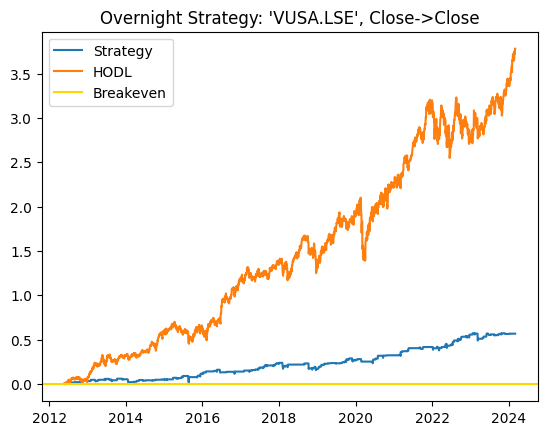

In [13]:
fig, ax = plt.subplots()
ax.plot(utils.get_cumulative_return(df_strat_ret, total=False), label="Strategy")
ax.plot(utils.get_cumulative_return(df_ret, total=False), label="HODL")
ax.axhline(y=0, label="Breakeven", color="gold")
ax.legend(loc="upper left")
plt.title(f"Overnight Strategy: {TICKER!r}, {ENTER_AT}->{EXIT_AT}")
plt.show()

## Describe Strategy

In [14]:
pd.concat([
    utils.describe(returns=df_strat_ret, pos=df_pos, daily=True, asset=TICKER),
    utils.describe(returns=df_ret, daily=True, asset=TICKER),
], axis=1)

,0,1
Asset,VUSA.LSE,VUSA.LSE
Start,2012-05-24,2012-05-24
End,2024-03-04,2024-03-04
Mean Return,0.16640%,0.05768%
Total Return,56.56%,377.91%
Median Return,0.09684%,0.07010%
1st Quartile,-0.44366%,-0.43119%
3rd Quartile,0.81989%,0.58996%
Std Dev Return,1.11433%,0.96660%
CAGR,16.023 bps,5.299 bps
